In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import json
import geopandas as gpd
import pandas as pd
import numpy as np
from src import preparedata
from src import modelarea
from src import inference
from src import savehazard
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
print(tf.__version__)
print(tf.config.list_physical_devices(
    device_type=None
))
params=json.load(open('params/params.json','r'))

2023-02-20 17:00:52.862372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 17:00:53.106116: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-20 17:00:53.165296: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-20 17:00:56.349623: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

2.10.1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


2023-02-20 17:01:18.691862: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-20 17:01:18.691942: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (login510-27): /proc/driver/nvidia/version does not exist


In [5]:
su=gpd.read_file('Data/SlopeUnits/SlopeUnits_V3.shp')

In [8]:
landslidehazard=modelarea.lhmodel(params['modelparam'])
landslidehazard.preparemodel()
hazcols=[]

def extractRp(su=su,models=['bcc-csm1-1','CanESM2','CNRM-CM5','GFDL-ESM2G','MPI-ESM-MR'],scenarios=['rcp45','rcp85'],rps=[5,10,15,20]):
    first=True
    for model in models:
        for scenario in scenarios:
            for rp in rps:
                dataset=preparedata.readGPDData(params['dataprepinargs'])
                dataset.preparedataclimate(rp=rp,model=model,scenario=scenario)
                haz=inference.inferenceLH(model=landslidehazard.model,model_weights='savedweights/final_modelfull_data.h5',xdata=dataset.Xinference,rp=rp)
                ids=dataset.InferenceID
                hazcol=f'{rp}_{scenario}_{model}'
                if first:
                    first=False
                    hazarddata=pd.DataFrame({'cat':ids,hazcol:haz})
                    # hazarddata=np.expand_dims(haz,axis=-1)
                else:
                    df=pd.DataFrame({hazcol:haz})
                    hazarddata=pd.concat([hazarddata,df],axis=1,join='inner')
                    # hazarddata=np.concatenate((hazarddata,np.expand_dims(haz,axis=-1)),axis=-1)
                print(hazarddata.shape)

                
                # 
                # df=pd.DataFrame({'cat':ids,hazcol:haz})
                # projections=su.merge(df,on='cat')
                hazcols.append(hazcol)
                # su=projections
                # break
            # break
        # break
    return hazarddata

In [9]:
haz=extractRp()

  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 2)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 3)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 4)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 5)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 6)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 7)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 8)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 9)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 10)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 11)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 12)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 13)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 14)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 15)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 16)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 17)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 18)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 19)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 20)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 21)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 22)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 23)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 24)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 25)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 26)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 27)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 28)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 29)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 30)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 31)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 32)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 33)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 34)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 35)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 36)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 37)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 38)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 39)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 40)


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step
(70994, 41)


In [10]:
haz.columns=['cat']+hazcols
haz=haz.drop_duplicates(subset=['cat'])

In [11]:
results=su.merge(haz,on='cat')
results.to_file('Data/Results/ClimateProjectionsv50.gpkg',driver='GPKG')

In [17]:
#combine them and save
cl_cols=[col for col in results.columns if '_rcp85' in col]
cl_cols2=[col for col in results.columns if '_rcp45' in col]

In [33]:
results['RCP45_5']=results[[col for col in cl_cols2 if col.startswith('5_r')]].mean(axis=1)
results['RCP45_10']=results[[col for col in cl_cols2 if col.startswith('10_r')]].mean(axis=1)
results['RCP45_15']=results[[col for col in cl_cols2 if col.startswith('15_r')]].mean(axis=1)
results['RCP45_20']=results[[col for col in cl_cols2 if col.startswith('20_r')]].mean(axis=1)

In [34]:
results['RCP85_5']=results[[col for col in cl_cols if col.startswith('5_r')]].mean(axis=1)
results['RCP85_10']=results[[col for col in cl_cols if col.startswith('10_r')]].mean(axis=1)
results['RCP85_15']=results[[col for col in cl_cols if col.startswith('15_r')]].mean(axis=1)
results['RCP85_20']=results[[col for col in cl_cols if col.startswith('20_r')]].mean(axis=1)

In [35]:
results[['Area', 'cat', 'geometry','RCP45_5','RCP45_10','RCP45_15','RCP45_20','RCP85_5','RCP85_10','RCP85_15','RCP85_20'  ]]

,Area,cat,geometry,RCP45_5,RCP45_10,RCP45_15,RCP45_20,RCP85_5,RCP85_10,RCP85_15,RCP85_20
0,28592.000,328069,"POLYGON ((87.92322 27.36778, 87.92322 27.36765...",0.111345,0.142707,0.160530,0.173126,0.111377,0.143447,0.161438,0.174231
1,158208.250,330938,"POLYGON ((84.68295 27.32927, 84.68310 27.32914...",0.100698,0.121415,0.131485,0.138246,0.100768,0.121514,0.131737,0.138544
2,107952.125,258925,"POLYGON ((87.92066 27.89643, 87.92066 27.89629...",0.095727,0.112797,0.120411,0.125195,0.095725,0.112794,0.120399,0.125181
3,1303298.000,322424,"POLYGON ((86.62012 27.41718, 86.62027 27.41718...",0.108819,0.137010,0.152017,0.162812,0.108783,0.136572,0.150452,0.160925
4,672897.500,216685,"POLYGON ((84.71505 28.14693, 84.71520 28.14693...",0.109742,0.138470,0.154192,0.165440,0.109709,0.138408,0.154049,0.165267
...,...,...,...,...,...,...,...,...,...,...,...
57665,442941.228,264675,"POLYGON ((85.58694 27.85435, 85.58694 27.85422...",0.101762,0.123171,0.133689,0.140861,0.101682,0.122841,0.133216,0.140299
57666,354301.978,330075,"POLYGON ((84.95872 27.33331, 84.95888 27.33317...",0.098584,0.116990,0.125263,0.130895,0.098611,0.117315,0.125850,0.131587
57667,407678.228,272183,"POLYGON ((85.44561 27.78812, 85.44561 27.78825...",0.113008,0.145530,0.164296,0.177712,0.113106,0.145670,0.164109,0.177484
57668,201503.989,363207,"POLYGON ((86.18556 26.95300, 86.18556 26.95313...",0.100758,0.121676,0.131889,0.138725,0.100743,0.121702,0.131828,0.138653


In [36]:
results.to_file('Data/Results/ClimateProjectionsv50_combined.gpkg',driver='GPKG')

# predict current situations

In [4]:
landslidehazard=modelarea.lhmodel(params['modelparam'])
landslidehazard.preparemodel()
hazcols=[]
rps=[5,10,15,20]
first=True
for rp in rps:
    dataset=preparedata.readGPDData(params['dataprepinargs'])
    dataset.preparedatainference(rp)
    haz=inference.inferenceLH(model=landslidehazard.model,model_weights='savedweights/final_modelfull_data.h5',xdata=dataset.Xinference,rp=rp)
    ids=dataset.InferenceID
    hazcol=f'{rp}'
    if first:
        first=False
        hazarddatacr=pd.DataFrame({'cat':ids,hazcol:haz})
        # hazarddata=np.expand_dims(haz,axis=-1)
    else:
        df=pd.DataFrame({hazcol:haz})
        hazarddatacr=pd.concat([hazarddatacr,df],axis=1,join='inner')


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step


  0%|          | 0/31 [00:00<?, ?it/s]

2219/2219 [==============================] - 3s 1ms/step


In [6]:
current_haz=su.merge(hazarddatacr,on='cat')
current_haz=current_haz.drop_duplicates(subset=['cat'])
current_haz.to_file('Data/Results/Current_predictionsv50.gpkg',driver='GPKG')

# Plot the projections

[0.10402639 0.12796975 0.1404991  0.14912506]
[0.10402869 0.12798038 0.14046625 0.14908358]
[0.10409046 0.12801468 0.1404599  0.14907913]
[0.10414896 0.12812541 0.14058656 0.14922955]
[0.10400244 0.12789256 0.14037657 0.14897277]
[0.10398648 0.12788109 0.14035044 0.14894077]
[0.104062   0.12797508 0.14038008 0.14898077]
[0.10399803 0.12784225 0.1402234  0.14878812]
[0.10404174 0.12796349 0.1404242  0.14903125]
[0.10406083 0.12797303 0.14035677 0.14894976]


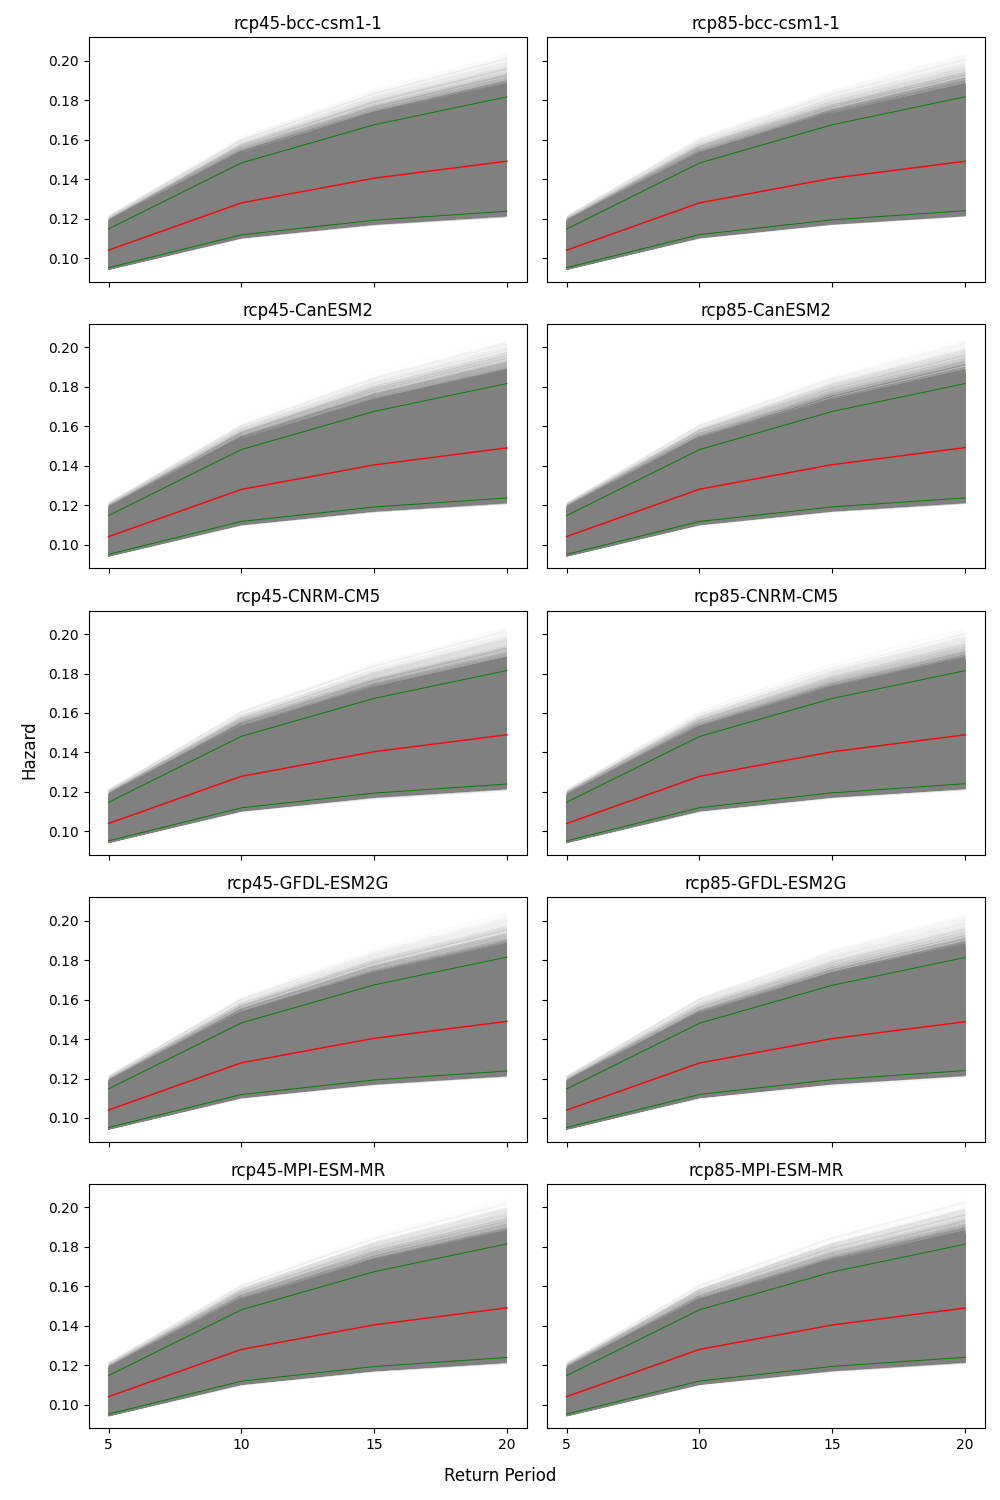

In [4]:
%matplotlib widget

results=gpd.read_file('Data/Results/ClimateProjectionsv50_combined.gpkg')
models=['bcc-csm1-1','CanESM2','CNRM-CM5','GFDL-ESM2G','MPI-ESM-MR']
scenarios=['rcp45','rcp85']
rps=[5,10,15,20]
f, axs = plt.subplots(5, 2, sharey=True,sharex=True,figsize=(10, 15))
f.supxlabel('Return Period')
f.supylabel('Hazard')
for model in models:
    for scenario in scenarios:
        fi_rp=f'5_{scenario}_{model}'
        te_rp=f'10_{scenario}_{model}'
        ff_rp=f'15_{scenario}_{model}'
        tw_rp=f'20_{scenario}_{model}'
        arr=results[[fi_rp,te_rp,ff_rp,tw_rp]].to_numpy()
        a=models.index(model)
        b=scenarios.index(scenario)
        print(arr.mean(axis=0))

        axs[a][b].plot([5,10,15,20],arr.swapaxes(0,1),color='grey',linewidth=0.01)
        axs[a][b].plot([5,10,15,20],arr.mean(axis=0),color='red',linewidth=1.0)
        axs[a][b].plot([5,10,15,20],np.percentile(arr, 5, axis=0),color='green',linewidth=0.7)
        axs[a][b].plot([5,10,15,20],np.percentile(arr, 95, axis=0),color='green',linewidth=0.7)

        # axs[a][b].plot([5,10,15,20],arr.mean(axis=0))
        # axs[a][b].fill_between([5,10,15,20],np.percentile(arr, 5, axis=0),np.percentile(arr, 95, axis=0),alpha=.1)
        axs[a][b].title.set_text(f'{scenario}-{model}')
        axs[a][b].xaxis.set_major_locator(ticker.FixedLocator([5,10,15,20]))
        # axs[a][b].plot([5,10,15,20],currHaz.min(axis=0), color='green')
        # axs[a][b].fill_between([5,10,15,20],np.percentile(currHaz, 5, axis=0),np.percentile(currHaz, 95, axis=0),alpha=.1, color='green')
plt.tight_layout()
plt.savefig('Data/Plots/climateprojectionsv50.pdf',dpi=300)
plt.savefig('Data/Plots/climateprojectionsv50.png',dpi=300)
plt.show()

[0.10404461 0.12796311 0.14042797 0.1490378 ]
[0.1040446  0.12796043 0.14039668 0.14899836]


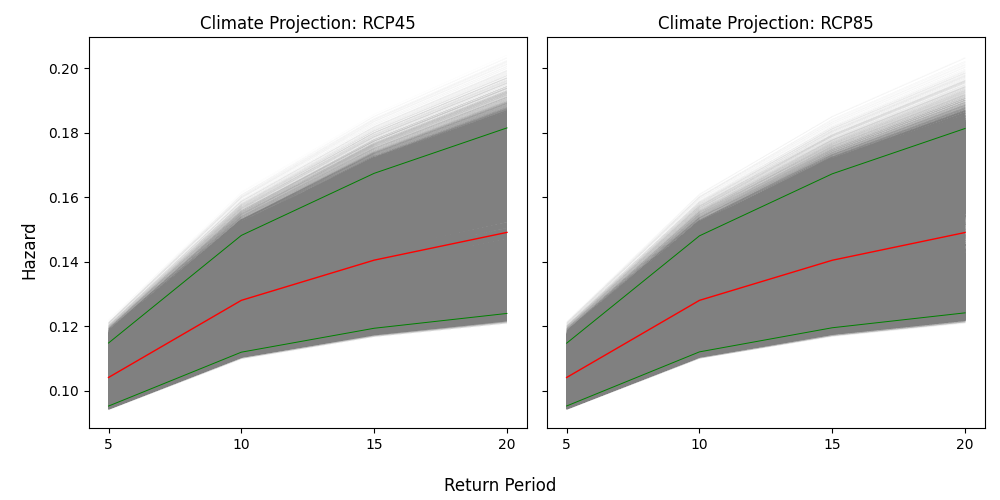

In [6]:
#plot combined
%matplotlib widget
#'RCP45_5','RCP45_10','RCP45_15','RCP45_20','RCP85_5','RCP85_10','RCP85_15','RCP85_20'
results=gpd.read_file('Data/Results/ClimateProjectionsv50_combined.gpkg')
models=['bcc-csm1-1','CanESM2','CNRM-CM5','GFDL-ESM2G','MPI-ESM-MR']
scenarios=['RCP45','RCP85']
rps=[5,10,15,20]
f, axs = plt.subplots(1, 2, sharey=True,sharex=True,figsize=(10, 5))
f.supxlabel('Return Period')
f.supylabel('Hazard')

for scenario in scenarios:
    fi_rp=f'{scenario}_5'
    te_rp=f'{scenario}_10'
    ff_rp=f'{scenario}_15'
    tw_rp=f'{scenario}_20'
    arr=results[[fi_rp,te_rp,ff_rp,tw_rp]].to_numpy()
    # a=models.index(model)
    b=scenarios.index(scenario)
    print(arr.mean(axis=0))
    
    axs[b].plot([5,10,15,20],arr.swapaxes(0,1),color='grey',linewidth=0.01)
    axs[b].plot([5,10,15,20],arr.mean(axis=0),color='red',linewidth=1.0)
    axs[b].plot([5,10,15,20],np.percentile(arr, 5, axis=0),color='green',linewidth=0.7)
    axs[b].plot([5,10,15,20],np.percentile(arr, 95, axis=0),color='green',linewidth=0.7)

    # axs[a][b].plot([5,10,15,20],arr.mean(axis=0))
    # axs[a][b].fill_between([5,10,15,20],np.percentile(arr, 5, axis=0),np.percentile(arr, 95, axis=0),alpha=.1)
    axs[b].title.set_text(f'Climate Projection: {scenario}')
    axs[b].xaxis.set_major_locator(ticker.FixedLocator([5,10,15,20]))
    # axs[a][b].plot([5,10,15,20],currHaz.min(axis=0), color='green')
    # axs[a][b].fill_between([5,10,15,20],np.percentile(currHaz, 5, axis=0),np.percentile(currHaz, 95, axis=0),alpha=.1, color='green')
plt.tight_layout()
plt.savefig('Data/Plots/climateprojectionsCombinedv50.pdf',dpi=300)
plt.savefig('Data/Plots/climateprojectionsCombinedv50.png',dpi=300)
plt.show()

In [2]:
current_haz=gpd.read_file('Data/Results/Current_predictionsv50.gpkg')

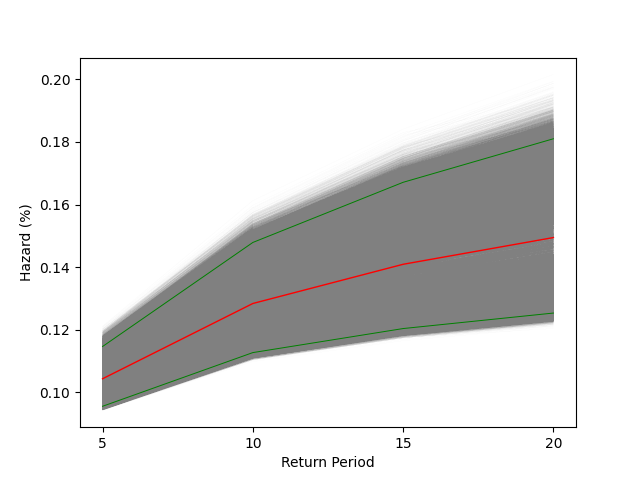

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt 
fig = plt.figure()
ax1 = fig.add_subplot(111)
currHaz=current_haz[['5', '10', '15', '20']].to_numpy()
ax1.plot([5,10,15,20],currHaz.swapaxes(0,1),color='grey',linewidth=0.01)
ax1.plot([5,10,15,20],currHaz.mean(axis=0),color='red',linewidth=1.0)
ax1.plot([5,10,15,20],np.percentile(currHaz, 5, axis=0),color='green',linewidth=0.7)
ax1.plot([5,10,15,20],np.percentile(currHaz, 95, axis=0),color='green',linewidth=0.7)
ax1.xaxis.set_major_locator(ticker.FixedLocator([5,10,15,20]))
plt.xlabel('Return Period')
plt.ylabel('Hazard (%)')
plt.savefig('Data/Plots/hazardPredictionsv50.pdf',dpi=300)
plt.savefig('Data/Plots/hazardPredictionsv50.png',dpi=500)